<a href="https://colab.research.google.com/github/3B032007/2025_ML_hws/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1、資料預處理

In [105]:
import tensorflow as tf
from tensorflow.keras import utils   # tf 2.0
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

In [106]:
from tensorflow.keras.datasets import fashion_mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= fashion_mnist.load_data()

In [107]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [108]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [109]:
y_Train_OneHot = utils.to_categorical(y_train_label)
y_Test_OneHot = utils.to_categorical(y_test_label)

In [110]:
#列出訓練資料和測試資料的形狀

print("訓練資料 x:", x_train_image.shape)
print("訓練資料 y:", y_train_label.shape)
print("測試資料 x:", x_test_image.shape)
print("測試資料 y:", y_test_label.shape)

訓練資料 x: (60000, 28, 28)
訓練資料 y: (60000,)
測試資料 x: (10000, 28, 28)
測試資料 y: (10000,)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30701 (\N{CJK UNIFIED IDEOGRAPH-77ED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38772 (\N{CJK UNIFIED IDEOGRAPH-9774}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 34915 (\N{CJK UNIFIED IDEOGRAPH-8863}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


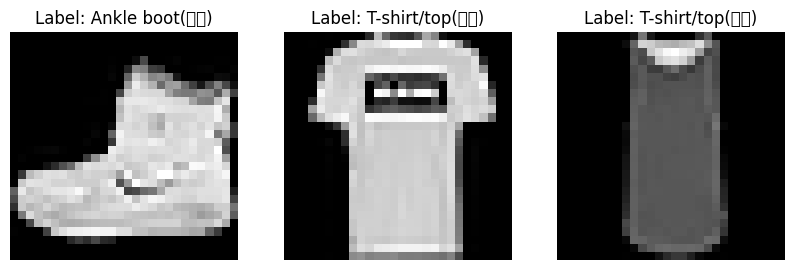

In [111]:
#顯示三張訓練資料的圖片及其標籤
labels_text = [
    "T-shirt/top(上衣)", "Trouser(褲子)", "Pullover(套衫)", "Dress(裙子)", "Coat(外套)",
    "Sandal(涼鞋)", "Shirt(襯衫)", "Sneaker(運動鞋)", "Bag(包包)", "Ankle boot(短靴)"
]

plt.figure(figsize=(10, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_train_image[i], cmap='gray')
    plt.title(f"Label: {labels_text[y_train_label[i]]}")
    plt.axis('off')
plt.show()

# 2、建立神經網路模型

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout

In [113]:
model = Sequential()

In [114]:
#將「輸入層」與「隱藏層1」加入模型

model.add(Dense(512, input_dim=784, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [115]:
#將「隱藏層2」加入模型

model.add(Dense(256, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.2))

In [116]:
#將「輸出層」加入模型

model.add(Dense(10, kernel_initializer='he_normal', activation='softmax'))

In [117]:
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

None


# 3、訓練模型

* 損失函數使用**crosse ntropy**
* 優化器(optimizer)使用**adam**，較**SGD(梯度下降)**快速收斂損失誤差

In [118]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [119]:
train_history=model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,
            epochs=20, batch_size=128, verbose=2)

Epoch 1/20
375/375 - 8s - 21ms/step - accuracy: 0.8012 - loss: 0.5579 - val_accuracy: 0.8445 - val_loss: 0.4244
Epoch 2/20
375/375 - 5s - 14ms/step - accuracy: 0.8543 - loss: 0.4013 - val_accuracy: 0.8621 - val_loss: 0.3699
Epoch 3/20
375/375 - 10s - 27ms/step - accuracy: 0.8675 - loss: 0.3606 - val_accuracy: 0.8668 - val_loss: 0.3572
Epoch 4/20
375/375 - 6s - 17ms/step - accuracy: 0.8753 - loss: 0.3361 - val_accuracy: 0.8675 - val_loss: 0.3561
Epoch 5/20
375/375 - 5s - 14ms/step - accuracy: 0.8823 - loss: 0.3181 - val_accuracy: 0.8733 - val_loss: 0.3450
Epoch 6/20
375/375 - 5s - 14ms/step - accuracy: 0.8856 - loss: 0.3053 - val_accuracy: 0.8862 - val_loss: 0.3168
Epoch 7/20
375/375 - 10s - 27ms/step - accuracy: 0.8910 - loss: 0.2926 - val_accuracy: 0.8873 - val_loss: 0.3105
Epoch 8/20
375/375 - 6s - 16ms/step - accuracy: 0.8939 - loss: 0.2839 - val_accuracy: 0.8885 - val_loss: 0.3123
Epoch 9/20
375/375 - 11s - 29ms/step - accuracy: 0.8965 - loss: 0.2737 - val_accuracy: 0.8873 - val_lo

#4、以折線圖顯示訓練過程的準確率(accuracy)與損失(loss)

In [120]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title(f'Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.grid(True)
    plt.show()

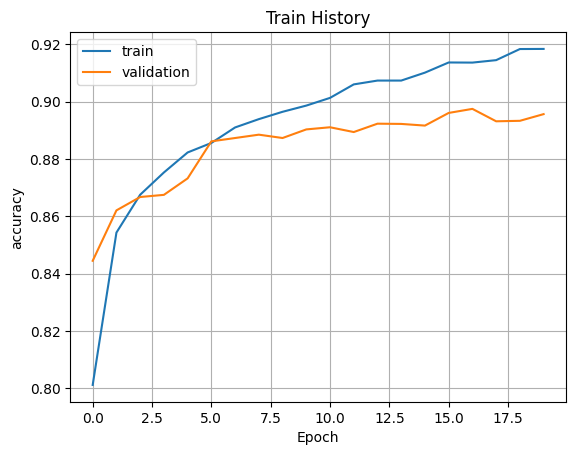

In [121]:
#準確率
show_train_history(train_history, 'accuracy', 'val_accuracy')

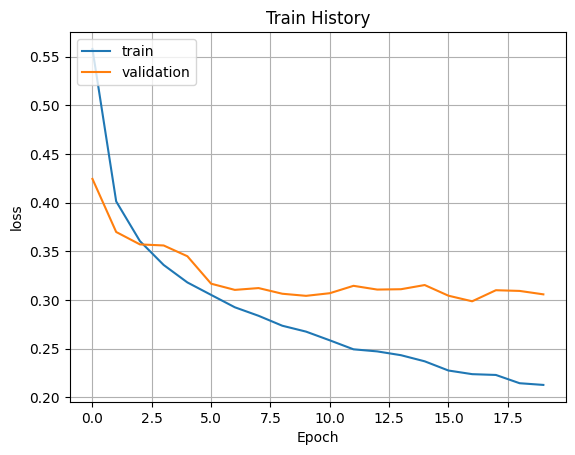

In [122]:
#損失誤差
show_train_history(train_history, 'loss', 'val_loss')

#5、評估模型準確率

In [123]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8867 - loss: 0.3283

accuracy= 0.8883000016212463


#6、進行預測

In [124]:
predictions = model.predict(x_Test)
prediction_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [142]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx], cmap='binary')
        true_label = labels_text[labels[idx]]
        title = f"True:{true_label}"
        if len(prediction) > 0:
            pred_label = labels_text[prediction[idx]]
            title += f"\npredict: {pred_label}"
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.tight_layout()
    plt.show()

<ipython-input-142-1536c0259c14>:18: UserWarning: Glyph 22806 (\N{CJK UNIFIED IDEOGRAPH-5916}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-142-1536c0259c14>:18: UserWarning: Glyph 22871 (\N{CJK UNIFIED IDEOGRAPH-5957}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-142-1536c0259c14>:18: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-142-1536c0259c14>:18: UserWarning: Glyph 34915 (\N{CJK UNIFIED IDEOGRAPH-8863}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-142-1536c0259c14>:18: UserWarning: Glyph 35033 (\N{CJK UNIFIED IDEOGRAPH-88D9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-142-1536c0259c14>:18: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-142-1536c0259c14>:18: UserWarning: Glyph 35122 (\N{CJK UNIFIED IDEOGRAPH-8932}) missi

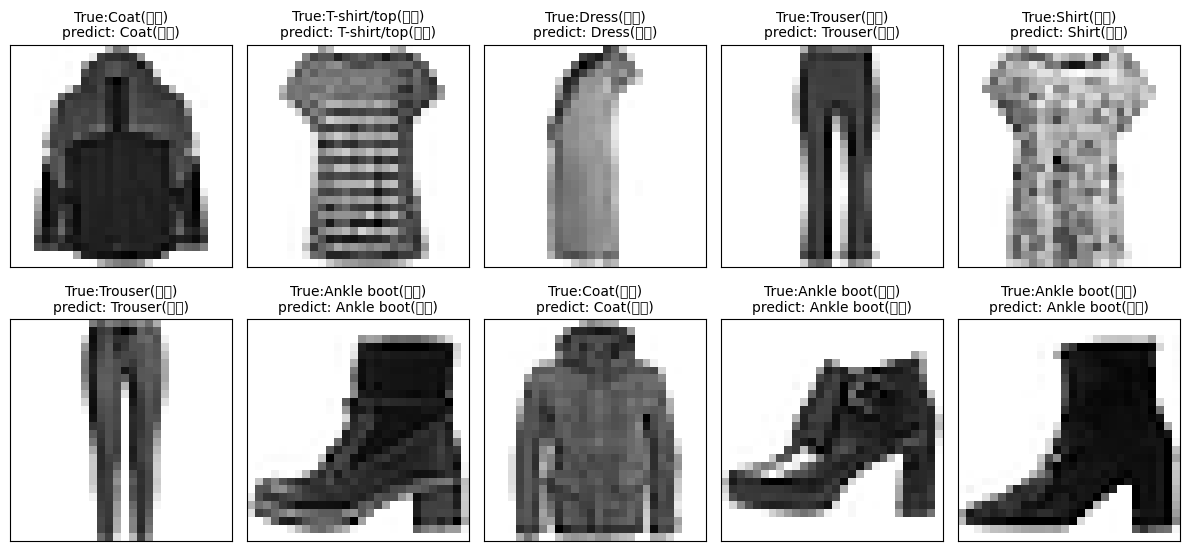

In [143]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction_labels, idx=340)

#7、以混淆矩陣(Confusion matrix)呈現預測結果

In [146]:
import pandas as pd
pd.crosstab(y_test_label,prediction_labels,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,845,20,12,19,9,1,80,0,14,0
1,0,985,2,5,7,0,0,0,1,0
2,18,2,661,8,267,0,40,0,4,0
3,13,35,11,846,70,0,17,0,8,0
4,0,0,30,13,936,0,17,0,4,0
5,0,0,0,0,0,942,0,16,2,40
6,124,14,69,24,202,0,554,0,13,0
7,0,0,0,0,0,13,0,906,0,81
8,4,0,3,2,5,1,1,4,980,0


In [148]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction_labels})
df[:2]

,label,predict
0,9,9
1,2,2


#8、儲存完整模型

In [152]:
model.save('fashion_mnist_dnn_model.h5')